In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [ ]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]
# re-run

In [ ]:
# Function to map all weather types into 5 categories
def map_weather(condition):
    condition = condition.lower()

    if "clear" in condition:
        return "Clear"
    elif "cloudy" in condition or "overcast" in condition:
        return "Cloudy"
    elif "rain" in condition or "drizzle" in condition or "shower" in condition or "thunderstorm" in condition:
        return "Rain"
    elif "snow" in condition:
        return "Snow"
    elif "fog" in condition or "haze" in condition or "mist" in condition:
        return "Fog/Haze"
    else:
        return "Fog/Haze"   # default fallback (forces into 5 groups)

# Apply mapping
dataset["Weather_Category"] = dataset["Weather"].apply(map_weather)

# Check results
print(dataset["Weather_Category"].value_counts())

Weather_Category
Cloudy      3797
Clear       3432
Rain         921
Snow         464
Fog/Haze     170
Name: count, dtype: int64


In [ ]:
dep=dataset[["Weather_Category"]]
# re-run

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cls=classification_report(y_test, y_pred)

In [ ]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.64      0.66      0.65       665
      Cloudy       0.65      0.66      0.65       772
    Fog/Haze       0.64      0.68      0.66        37
        Rain       0.57      0.53      0.55       178
        Snow       0.77      0.65      0.70       105

    accuracy                           0.65      1757
   macro avg       0.66      0.64      0.64      1757
weighted avg       0.65      0.65      0.65      1757



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report

cls = classification_report(y_test, y_pred)


In [ ]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.74      0.77      0.75       667
      Cloudy       0.71      0.75      0.73       758
    Fog/Haze       0.76      0.50      0.60        44
        Rain       0.70      0.52      0.59       192
        Snow       0.77      0.74      0.76        96

    accuracy                           0.72      1757
   macro avg       0.74      0.65      0.69      1757
weighted avg       0.72      0.72      0.72      1757



In [ ]:
from sklearn.metrics import confusion_matrix
#  trained model for predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[515 150   0   2   0]
 [169 565   0  20   4]
 [  0   0  22  17   5]
 [  9  67   5  99  12]
 [  6  13   2   4  71]]


Temp_C: Skewness = -0.18, Kurtosis = -0.92
Dew Point Temp_C: Skewness = -0.32, Kurtosis = -0.82
Rel Hum_%: Skewness = -0.32, Kurtosis = -0.55
Wind Speed_km/h: Skewness = 0.87, Kurtosis = 1.54
Visibility_km: Skewness = 0.41, Kurtosis = -0.35
Press_kPa: Skewness = -0.23, Kurtosis = 0.71


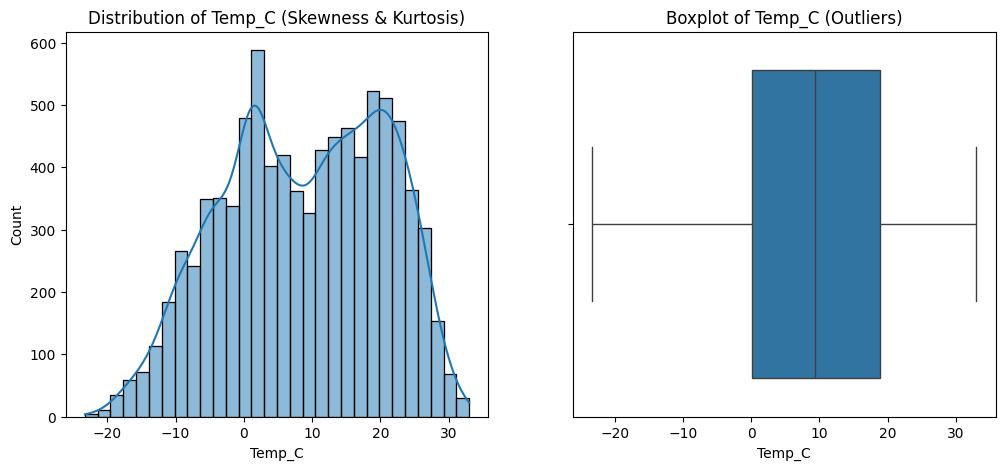

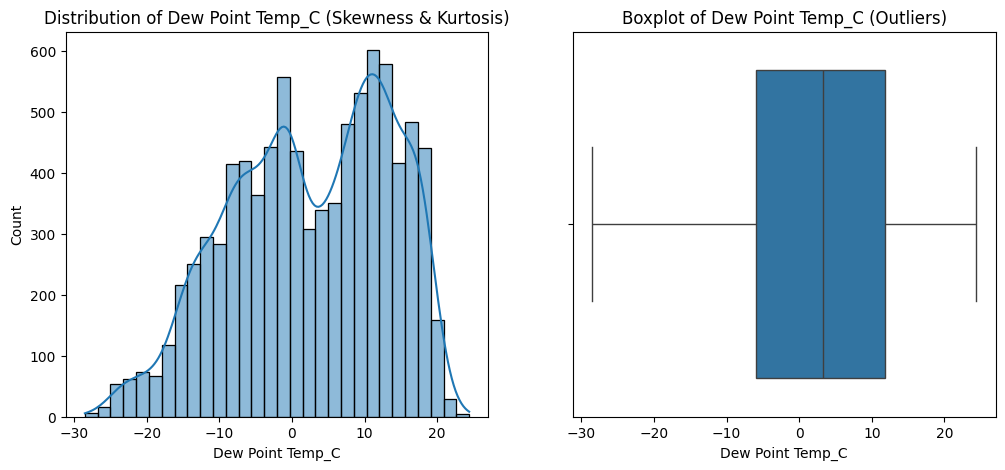

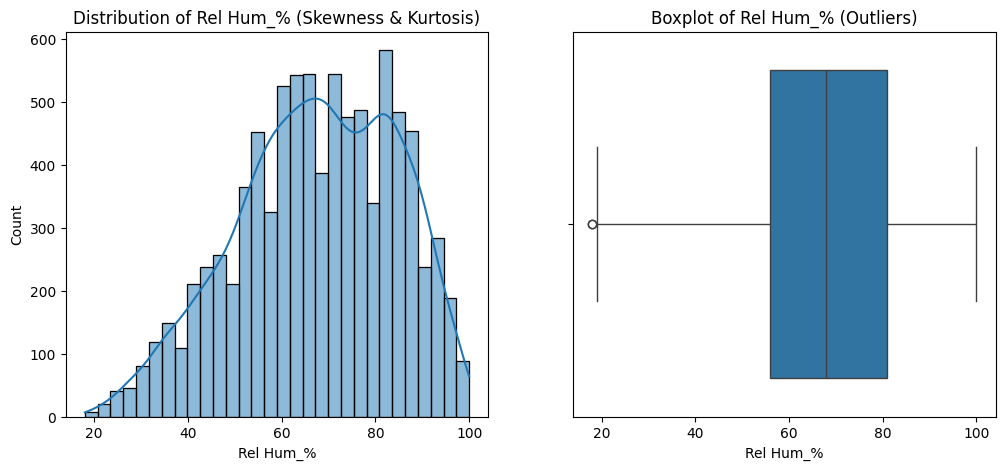

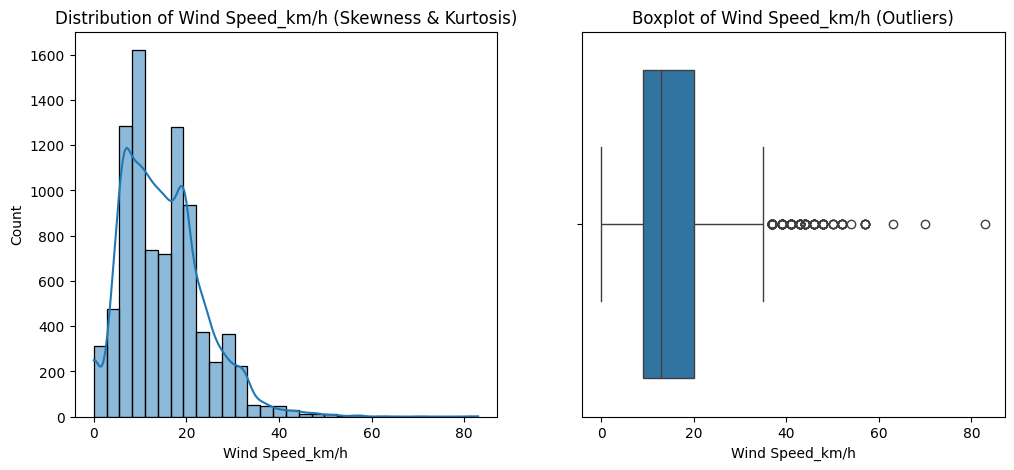

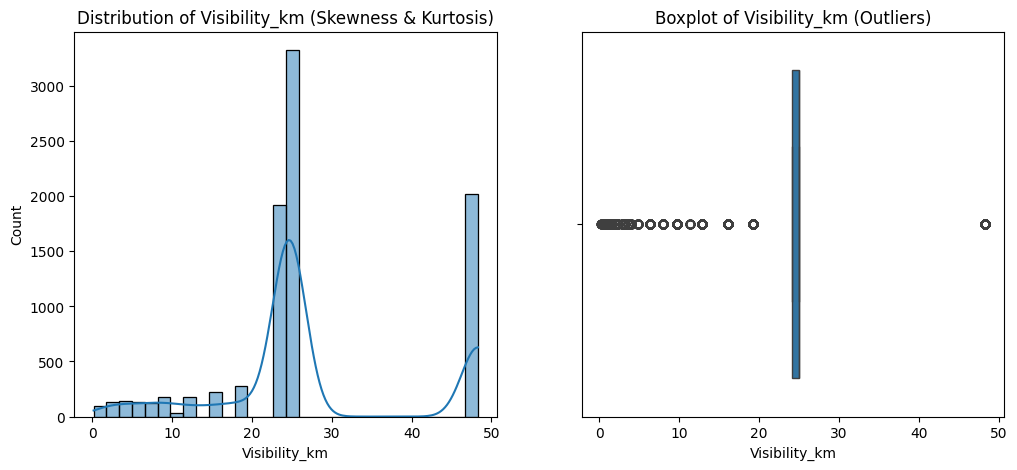

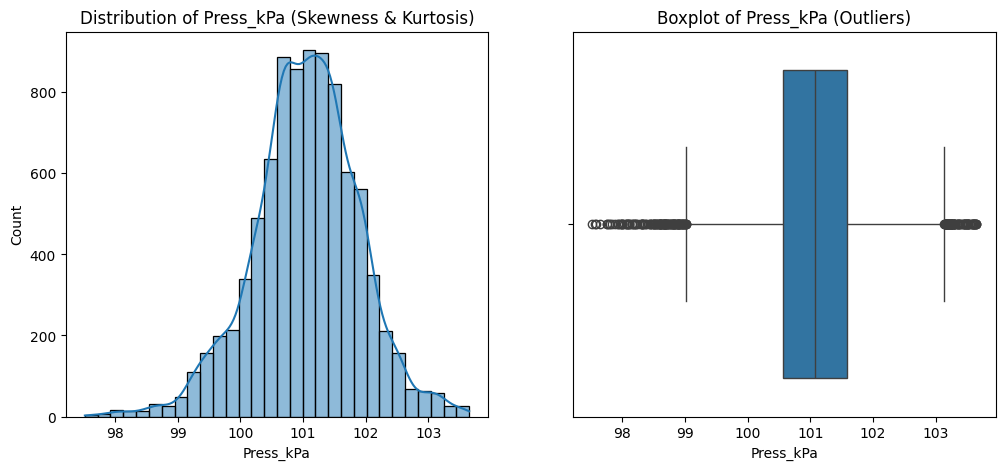

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Select numeric features
num_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Calculate skewness and kurtosis
for col in num_cols:
    print(f"{col}: Skewness = {skew(dataset[col]):.2f}, Kurtosis = {kurtosis(dataset[col]):.2f}")

# Plot distributions with boxplots (to check outliers visually)
for col in num_cols:
    plt.figure(figsize=(12,5))

    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Skewness & Kurtosis)")

    # Boxplot for outlier detection
    plt.subplot(1,2,2)
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot of {col} (Outliers)")

    plt.show()
